> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 가변수

In [1]:
library(ggplot2)

## Example

In [34]:
dt <- data.frame(
  y = c(17,26,21,30,22,1,12,19,4,16,
        28,15,11,38,31,21,20,13,30,14),
  x1 = c(151,92,175,31,104,277,210,120,290,238,
         164,272,295,68,85,224,166,305,124,246),
  x2 = rep(c('M','F'), each=10)
)


In [3]:
head(dt)

,y,x1,x2
,<dbl>,<dbl>,<chr>
1,17,151,M
2,26,92,M
3,21,175,M
4,30,31,M
5,22,104,M
6,1,277,M


### 모든 데이터 퉁으로

In [4]:
model_1 <- lm(y~x1, dt)
summary(model_1)


Call:
lm(formula = y ~ x1, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-9.579 -4.737  0.721  4.224  7.936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.40361    2.78580  13.068 1.26e-10 ***
x1          -0.09323    0.01396  -6.677 2.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.124 on 18 degrees of freedom
Multiple R-squared:  0.7124,	Adjusted R-squared:  0.6964 
F-statistic: 44.58 on 1 and 18 DF,  p-value: 2.906e-06


- 모형은 유의하다.

- MSE=5.124

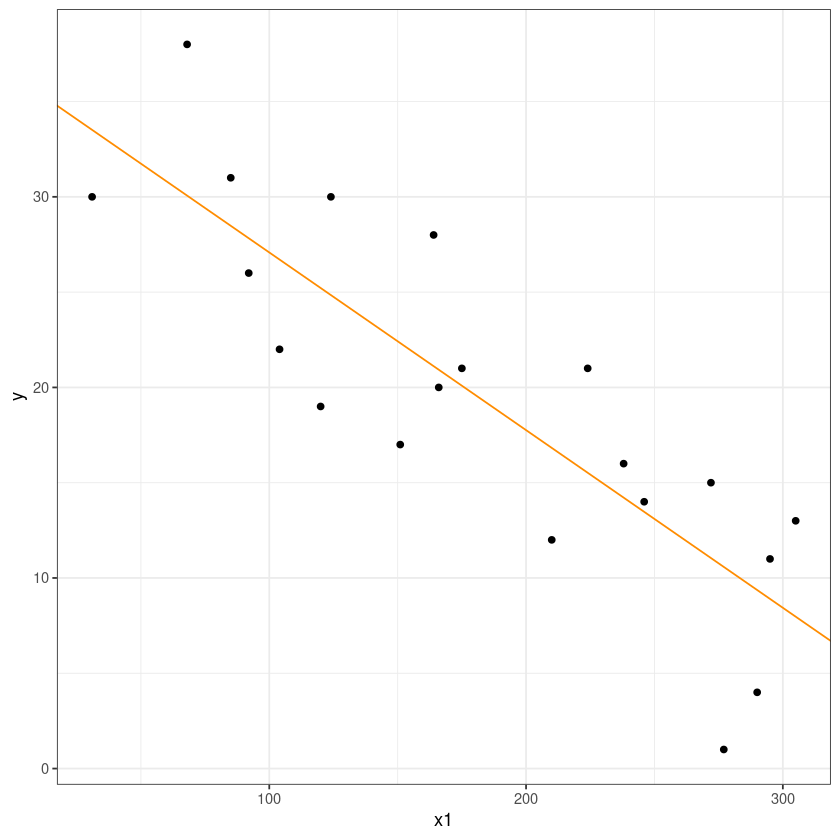

In [5]:
ggplot(dt, aes(x1, y)) + 
  geom_point() + 
  geom_abline(slope = coef(model_1)[2], 
              intercept = coef(model_1)[1], col= 'darkorange')+
  theme_bw()

- M,F상관없이 모든 데이터 퉁으로!!

- $\widehat y = 36.40361-0.09323 x_1$

- 시험성적 1점 올라갈때마다 시간이 0.0932 감소한다.

### 성별 M,F

- model_2 : $y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$

- $x_2=0 \ if F, x_2=1 \ if M$
    
- $E(y|F) : \beta_0 + \beta_1x_1$ 여자가 기준

- $E(y|M) : \beta_0+\beta_1x_1 + \beta_2 = (\beta_0+\beta_2)+\beta_1x_1$

- $\beta_2 = E(y|M)-E(y|F) = \beta_0 + \beta_2 + \beta_1x_1 - {\beta_0+\beta_1x_1}$

- 즉, $\beta_2$는 시험성적이 동일할 때 여자와 남자의 소요시간의 평균의 차이

In [6]:
contrasts(factor(dt$x2))

,M
F,0
M,1


- $x_2$를 factor로 인식했을 때 무엇이 0이고 무엇이 1인지 알려준다.

- $H_0: \beta_1=\beta_2=0$

In [7]:
################################
# x2 = factor(rep(c('M','F'), each=10)) 로 입력한 경우 
#y = b0 + b1x1 + b2x2 
# x2 = 0,  F
# x2 = 1,  M
#E(y|M) : b0 + b1x1 + b2 = (b0 + b2) + b1x1
#E(y|F) : b0 + b1x1

# x2 = factor(rep(c(0,1), each=10))로 입력한 경우 
# y = b0 + b1x1 + b2x2 
# x2 = 0,  M
# x2 = 1,  F
#E(y|M) : b0 + b1x1
#E(y|F) : b0 + b1x1+ b2 = = (b0 + b2) + b1x1


model_2 <- lm(y~x1+x2, dt)
summary(model_2)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.768865   1.948930  21.432 9.64e-14 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x2M         -7.933953   1.414702  -5.608 3.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09


- p-value가 유의하다.

- model1보다 $R^2$값이 많이 올랐다.

- model1보다 MSE보다 감소했다.

- `x2M`: x2가 남자 그룹에 있는 계수, F=0이고 M=1이라는 것을 알려준다.

- $\beta_2=-7.933953$ 값이 나오는데 강의록에는 F=1,M=0이여서 강의록과는 부호가 바뀐것.

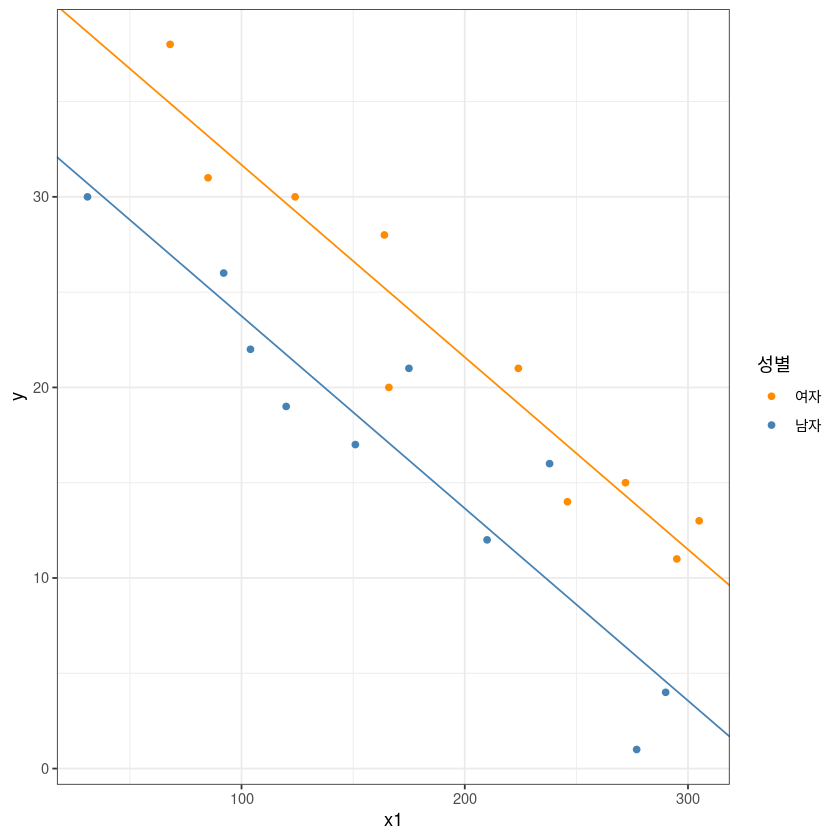

In [8]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(model_2)[2], 
              intercept = coef(model_2)[1], col= 'darkorange')+
  geom_abline(slope = coef(model_2)[2], 
              intercept = coef(model_2)[1]+coef(model_2)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))


- $H_0:\beta_2=0 \ vs. \ H_1:\beta_2 \neq 0$

In [9]:
summary(model_2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),41.7688646,1.948929636,21.431694,9.640000e-14
x1,-0.1009177,0.008620641,-11.706522,1.468240e-09
x2M,-7.9339526,1.414702366,-5.608213,3.134533e-05


- 개별회귀계수에 대한 유의성검정 , 유의확률 값이 작으므로 $\beta_2=0$이라고 할 수 있다.

- `Pr(>|t|)`은 양측검정에 대한 유의확률 값이다.

- $H_0:\beta_2=0 \ vs. \ H_1:\beta_2 < 0$

- 이 때의 유의확률? -> 위의 표와 t-value는 똑같다. `-5.608213`

- $t=\dfrac{\widehat \beta_2}{\widehat{s.e}(\widehat \beta_2)}$

- `H_1:\beta_2 < 0` 단측 검정에 대한 유의확률 값은 `Pr(>|t|)/2`

- t-value의 `-5.608213` 값을 제곱하면 아래 표의 F값 `31.45206` 이 나온다. `Pr(>F)`값은 똑같음

In [10]:
-5.608213^2

[1] -31.45205

- 자유도가 1개일때 t-value와 F검정의 값은 동일하다

In [11]:
anova(model_1, model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,472.5913,NA,NA,NA,NA
2,17,165.8145,1,306.7768,31.45206,3.134533e-05


- RM: model_1

- FM: model_2

- `472.5913` : $SSE_{RM}$

- `165.8145` : $SSE_{FM}$

### 교호작용

$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1x_2+\epsilon$

$x_2 = 0 if F, x_2 = 1 if M$

$E(y|F): \beta_0 + \beta_1 x_1$

$E(y|M): \beta_0 + \beta_1x_1 + \beta_2 + \beta_3 x_1 = (\beta_0+\beta_2) + (\beta_1+\beta_3)x_1$

In [12]:
model_3 <- lm(y~x1*x2, dt) #교호작용 보고 싶을 떈 x1*x2 곱하기
# 혹은 lm(y~x1+x2+x1:x2,dt)
summary(model_3)



Call:
lm(formula = y ~ x1 * x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0463 -1.7591 -0.6232  1.9311  6.1102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.969620   2.635580  15.924 3.11e-11 ***
x1          -0.101948   0.012474  -8.173 4.20e-07 ***
x2M         -8.313516   3.541379  -2.348   0.0321 *  
x1:x2M       0.002089   0.017766   0.118   0.9078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 16 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8803 
F-statistic: 47.56 on 3 and 16 DF,  p-value: 3.405e-08


- 모형 자첸는 유의하고, 

- model2에 비하면 $R^2$가 더 감소했다.

- $H_0: \beta_3=0 \ vs. \ H_1:\beta_3 \neq 0$에서 $H_0$기각 못함

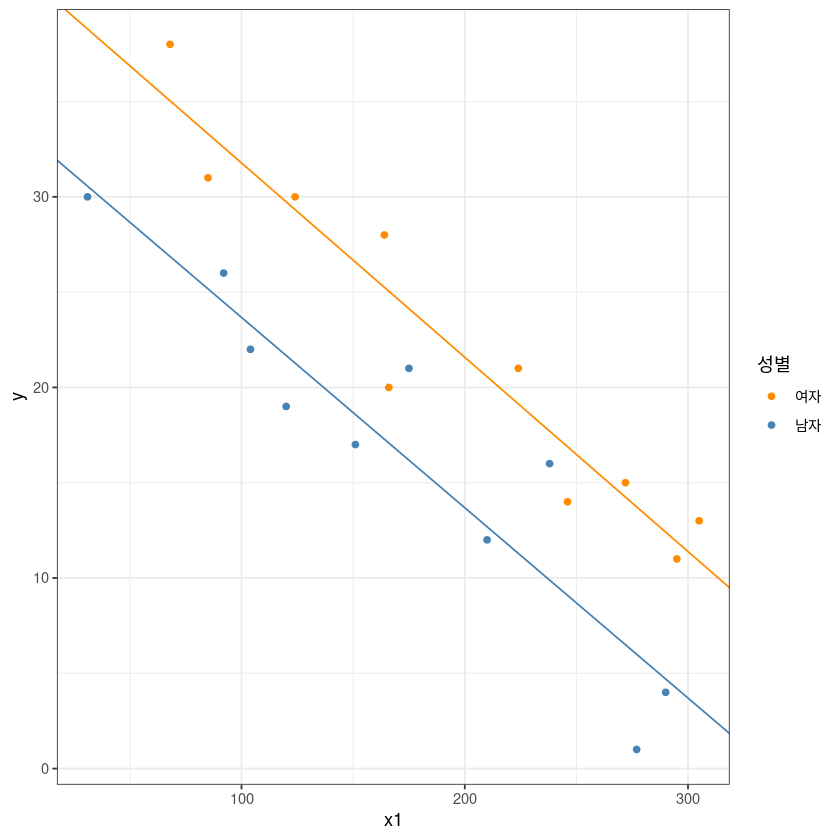

In [13]:
## y = b0 + b1x1 + b2x2 + b3x1x2
## M : x2=0 => E(y|M) = b0+b1x1
## F : x2=1 => E(y|F) = b0 + b1x1 + b2 + b3x1 
##                    = (b0+b2) + (b1+b3)x1

ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(model_3)[2], 
              intercept = coef(model_3)[1], col= 'darkorange')+
  geom_abline(slope = coef(model_3)[2]+coef(model_3)[4], 
              intercept = coef(model_3)[1]+coef(model_3)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))

- $H_0: \beta_3=0 \ vs. \ H_1:\beta_3 \neq 0$

In [14]:
summary(model_3)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),41.96961960,2.63558045,15.9242415,3.106803e-11
x1,-0.10194777,0.01247420,-8.1726893,4.198832e-07
x2M,-8.31351564,3.54137909,-2.3475362,3.209176e-02
x1:x2M,0.00208933,0.01776597,0.1176029,9.078460e-01


In [15]:
anova(model_2, model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,165.8145,NA,NA,NA,NA
2,16,165.6713,1,0.1432067,0.01383045,0.907846


$H_0: \beta_2=\beta_3=0 \ vs. \ H_1: not H_0$ 에서

RM: model_1 (x1), FM: model_3 (x1*x2) 아래표 보자

In [16]:
anova(model_1, model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,472.5913,NA,NA,NA,NA
2,16,165.6713,2,306.92,14.82068,0.0002280824


`472.5913`=SSE_RM

`165.6713`=SSE_FM

`2`=3-1

### 가변수가 아닌 one-hot encodeing

In [17]:
dt2 <- data.frame(y=dt$y,
                  x1=dt$x1,
                  x2=as.numeric(dt$x2=='M'),
                  x3=as.numeric(dt$x2=='F'))
head(dt2)
                                    

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,17,151,1,0
2,26,92,1,0
3,21,175,1,0
4,30,31,1,0
5,22,104,1,0
6,1,277,1,0


In [18]:
model_4 <-lm(y~., dt2)
summary(model_4)


Call:
lm(formula = y ~ ., data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.768865   1.948930  21.432 9.64e-14 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x2          -7.933953   1.414702  -5.608 3.13e-05 ***
x3                 NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09


- $y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\epsilon$

- full Rank가 아니여서 구할 수 없다..

- 1 = x2(M)+x3(F) 가 되서 full rank가 안되는데 이중 하나를 날리면 된다.

- 아래 model_5는 절편이 없는 모델을 만들어서 돌려보자

In [19]:
model_5 <- lm(y~0+x1+x2+x3,dt2)
summary(model_5)


Call:
lm(formula = y ~ 0 + x1 + x2 + x3, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
x1 -0.100918   0.008621  -11.71 1.47e-09 ***
x2 33.834912   1.758659   19.24 5.64e-13 ***
x3 41.768865   1.948930   21.43 9.64e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.982,	Adjusted R-squared:  0.9788 
F-statistic:   309 on 3 and 17 DF,  p-value: 5.047e-15


- modle5 : $y=\beta_1x_1+\beta_2x_2 + \beta_3x_3 + \epsilon$

- $x_2 = 1 if M, x_2=0 if F$
    
- $x_3 = 0 if M, x_3=1 if F$

- $E(y|M) = \beta_1x_1 + \beta_2$    - (*)

- $E(y|F) = \beta_1 + \beta_3$

- 기울기는 동일한데, 절편이 다르다. 잎에서 쓴 모형과 비교해 본다면,

- $E(y|M) = (\beta_0 + \beta_2) + \beta_1x_1$에서 (*)의 $\beta_2 = \beta_0+\beta_2$

## Carseats 예시

In [20]:
install.packages("ISLR")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [21]:
library(ISLR)

In [22]:
head(Carseats)
dim(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


[1] 400  11

• Sales : 판매량 (단위: 1,000)

• Price : 각 지점에서의 카시트 가격

• ShelveLoc : 진열대의 등급 (Bad, Medium, Good)

• Urban :도시 여부 (Yes, No)

• US: 미국 여부 (Yes, No)

- 판매량을 예측하자.

- $y=\beta_0 + \beta_1x_1 + \beta_2  x_2 + \beta_3 x_3 + \epsilon$

- $x_1$:Price, $x_2,x_3$는 가변수

- $x_2 = 1$, if ShelveLoc = Good, $x_2=0$, if o.w.

- $x_3 = 1$, if ShelveLoc = Medium, $x_3=0$, if o.w.

- $E(y|Bad) = \beta_0+\beta_1x_1$           <- base

- $E(y|Med) = \beta_0 + \beta_1x_1+ \beta_3 = (\beta_0+\beta_3)+\beta_1x_1$

- $E(y|Good) = \beta_0 + \beta_1x_1 + \beta_2 = (\beta_0+\beta_2) + \beta_1x_1$

In [23]:
fit <- lm(fit<-lm(Sales~Price+ShelveLoc, 
                  data=Carseats))
summary(fit)  


Call:
lm(formula = fit <- lm(Sales ~ Price + ShelveLoc, data = Carseats))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8229 -1.3930 -0.0179  1.3868  5.0780 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     12.001802   0.503447  23.839  < 2e-16 ***
Price           -0.056698   0.004059 -13.967  < 2e-16 ***
ShelveLocGood    4.895848   0.285921  17.123  < 2e-16 ***
ShelveLocMedium  1.862022   0.234748   7.932 2.23e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.917 on 396 degrees of freedom
Multiple R-squared:  0.5426,	Adjusted R-squared:  0.5391 
F-statistic: 156.6 on 3 and 396 DF,  p-value: < 2.2e-16


- 교호작용은 보지 않겠따.

In [24]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


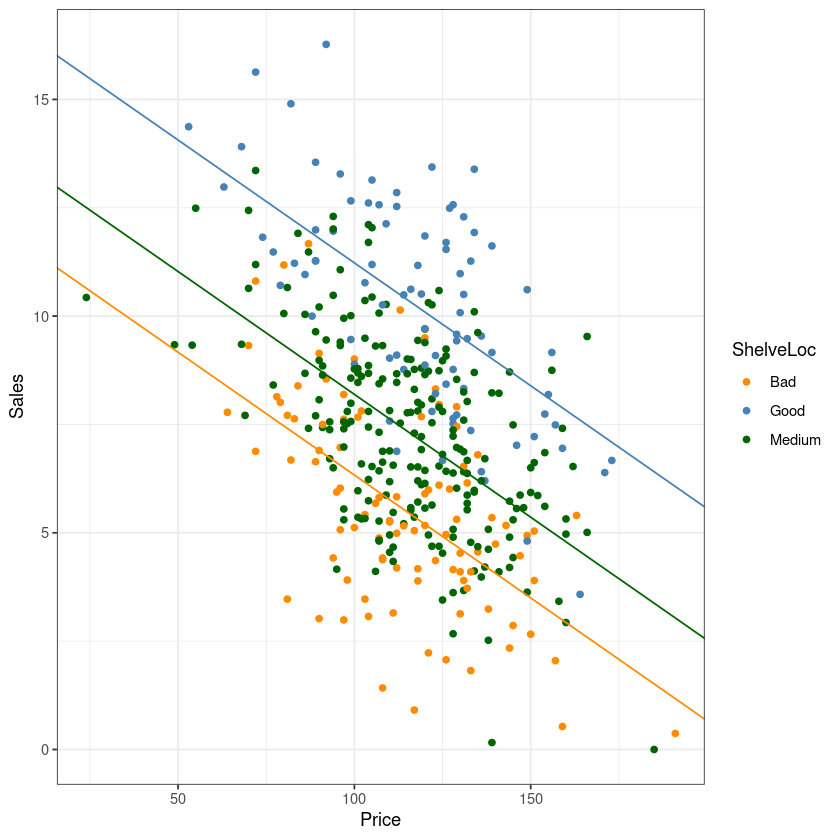

In [25]:
ggplot(Carseats, aes(Price, Sales, col=ShelveLoc)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1], col= 'darkorange')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[3], col= 'steelblue')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[4], col= 'darkgreen')+
  guides(col=guide_legend(title="ShelveLoc")) +
  scale_color_manual(labels = c("Bad", "Good", "Medium"), 
                     values = c("darkorange", "steelblue","darkgreen"))


- $y=\beta_0 + \beta_1x_1 + \beta_2  x_2 + \beta_3 x_3 + \beta_4 x_4 \epsilon$

- $x_2 = 1$, if ShelveLoc = Good, $x_2=0$, if o.w.

- $x_3 = 1$, if ShelveLoc = Medium, $x_3=0$, if o.w.

- $x_4 = 1$, if US=yes, $x_4=0$, if US=no

In [26]:
contrasts(Carseats$US)

,Yes
No,0
Yes,1


In [27]:
fit1 <- lm(fit<-lm(Sales~Price+ShelveLoc+US, 
                  data=Carseats))
summary(fit1)  


Call:
lm(formula = fit <- lm(Sales ~ Price + ShelveLoc + US, data = Carseats))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1720 -1.2587 -0.0056  1.2815  4.7462 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.476347   0.498083  23.041  < 2e-16 ***
Price           -0.057825   0.003938 -14.683  < 2e-16 ***
ShelveLocGood    4.827167   0.277294  17.408  < 2e-16 ***
ShelveLocMedium  1.893360   0.227486   8.323 1.42e-15 ***
USYes            1.013071   0.195034   5.194 3.30e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.857 on 395 degrees of freedom
Multiple R-squared:  0.5718,	Adjusted R-squared:  0.5675 
F-statistic: 131.9 on 4 and 395 DF,  p-value: < 2.2e-16


## 구간별 회귀분석 

In [28]:
dt <- data.frame(
  y = c(377,249,355,475,139,452,440,257),
  x1 = c(480,720,570,300,800,400,340,650)
)

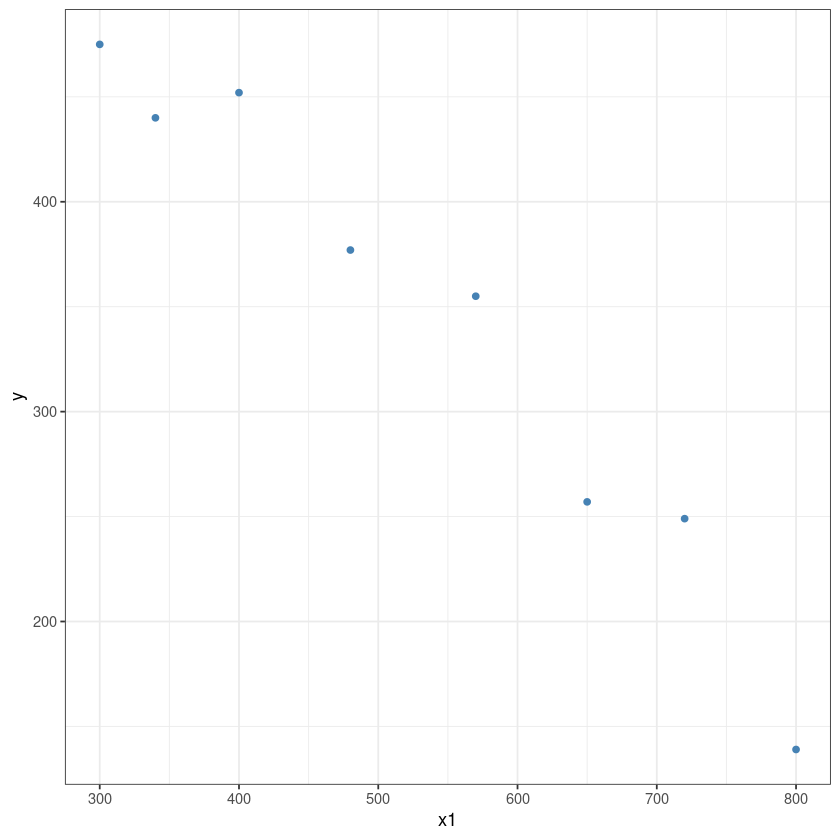

In [29]:
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') + 
  theme_bw()

In [30]:


### threshould = 500
## x2(x1-xw)=x2(x1-500) = (x1 - 500)+ := x2

dt$x2 = sapply(dt$x1, function(x) max(0, x-500))


In [31]:
m <- lm(y ~ x1+x2, dt)
summary(m)



Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
      1       2       3       4       5       6       7       8 
-22.765  29.765  18.068   4.068 -17.463  20.605 -15.117 -17.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 589.5447    60.4213   9.757 0.000192 ***
x1           -0.3954     0.1492  -2.650 0.045432 *  
x2           -0.3893     0.2310  -1.685 0.152774    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.49 on 5 degrees of freedom
Multiple R-squared:  0.9693,	Adjusted R-squared:  0.9571 
F-statistic: 79.06 on 2 and 5 DF,  p-value: 0.0001645


In [32]:

dt2 <- rbind(dt[,2:3], c(500,0))
dt2$y <- predict(m, newdata = dt2)

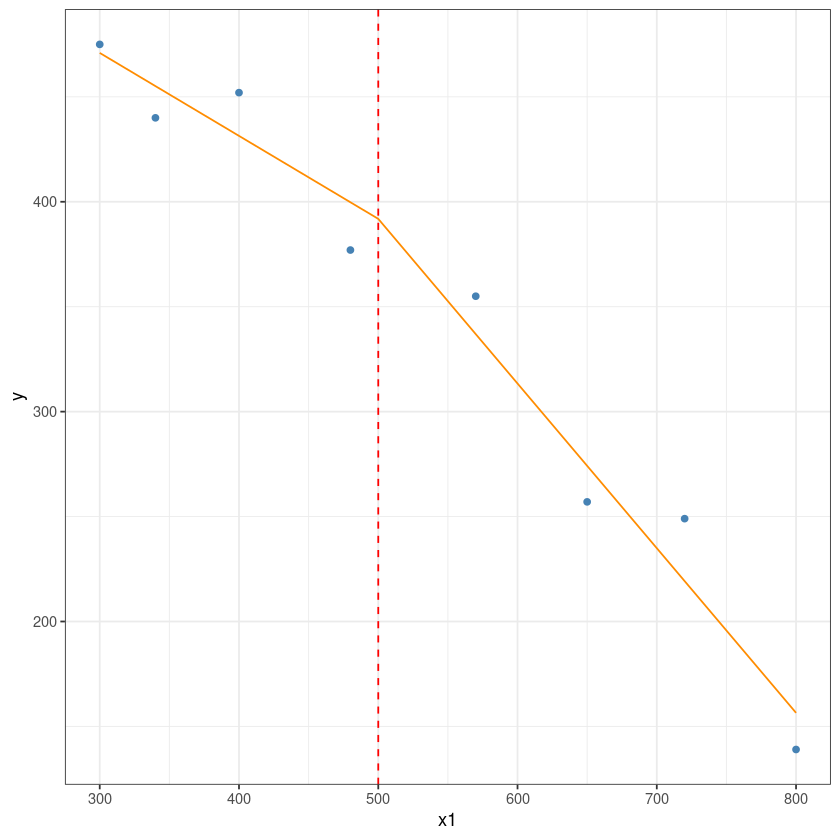

In [33]:
# this is the predicted line of multiple linear regression
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') +
  geom_line(color='darkorange',
            data = dt2, aes(x=x1, y=y))+
  geom_vline(xintercept = 500, lty=2, col='red')+
  theme_bw()